<a href="https://colab.research.google.com/github/kevinguan-glitch/Breast-Cancer-Malignancy-Prediction/blob/main/K_Nearest_Neighbors_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2 Major types of Supervised Machine Learning
# 1. **Classification**: Predict a class label which is a choice from a predefined list of possibilities.

* Sometimes separated into binary classification which is special case between exactly 2 classes i.e. predicting if email is spam or not spam 

* Multiclass classification - classification between more than 2 classes i.e. predicting iris from 3 classes.


# 2. **Regression**:  predict a continuous number, or a floating-point number in programming terms. 
i.e. predicting a person's income from person's age, home address, and education level 

#Generalization, Overfitting, and Underfitting
Generalization = machine learning model can accurately make predictions from training set to the test set. 

Overfitting = complex model that works for the training set but not the test set 

Underfitting = too simple of model for the training set and test set. 

In [ ]:
#Install the mglearn package for this book
! pip install mglearn
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)
import matplotlib.pyplot as plt

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)
from IPython.display import display

import sklearn 
print("scikit-learn version:", sklearn.__version__)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1


X.shape:  (26, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


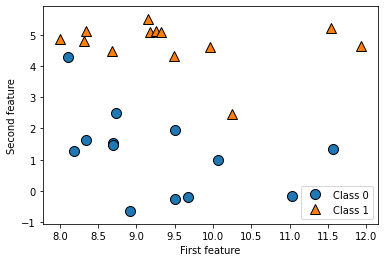

In [ ]:
#generate dataset
x, y = mglearn.datasets.make_forge()
#plot dataset
mglearn.discrete_scatter(x[:,0], x[:, 1], y) 


plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: ", x.shape)


#Illustrate regression algorithms
Use a syntehtic wave dataset 

The wave dataset has a single input feature and a continuous target variable (or response)

Text(0, 0.5, 'Target')

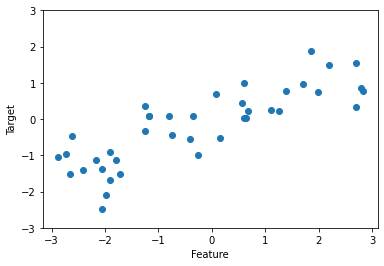

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [ ]:
from sklearn.datasets import load_breast_cancer
#wisconsin breast cancer dataset
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Bunch classes are like dictionaries and can be accessed using a dot. 

bunch.key instead of bunch["keys"]

In [ ]:
print("Shape of cancer data:", cancer.data.shape)
print("Sample counts per class:\n", 
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

print("Feaute names: \n", cancer.feature_names)

Shape of cancer data: (569, 30)
Sample counts per class:
 {'malignant': 212, 'benign': 357}
Feaute names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print("Cancer Description: \n", cancer.DESCR)

Cancer Description: 
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fie

#Boston Housing Market 
Using regression to predict the housing price in Boston based on median value of homes in several Boston neighborhoods in the 1970s, crime rates, proximity to the Charles River, highway accessibility, etc.)

In [ ]:
from sklearn.datasets import load_boston 
boston = load_boston()
print("Boston Data Shape: ", boston.data.shape)

Boston Data Shape:  (506, 13)


In [ ]:
print("Boston Description: \n", boston.DESCR)

Boston Description: 
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: ", X.shape)

X.shape:  (506, 104)


#k-Nearest Neighbors

k-NN algorithm is the simplest machine learning algorithm. Building the model consists only of storing the training dataset. 

To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset -its "nearest" neighbor 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


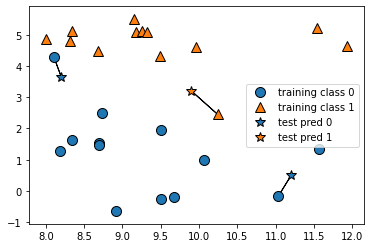

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

Using voting to find an arbitary number k of neighbors

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


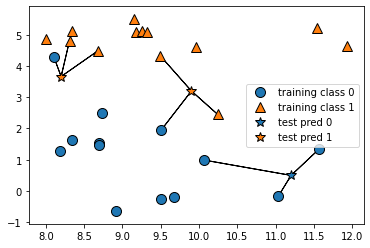

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


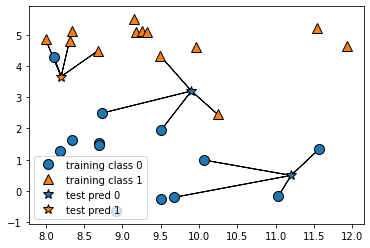

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


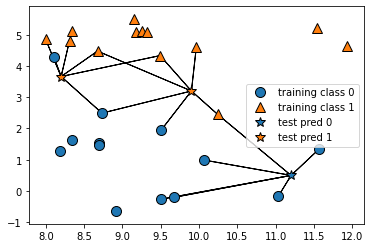

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


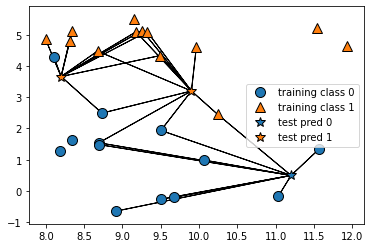

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 10)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Fitting the classifier using the training set. For KNeighborsClassifier, store the dataset and computer the niehbors during prediction 

In [ ]:
clf.fit(X_train, y_train)

print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate the model's generalization, call the store method with the test data together 

In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#Analyzing KNeighborsClassifier 
For 2 dimensional datasets, illustrate the prediction for all the possible test points in the xy-plane. 

Color the plane according to the class that would be assinged to a point in this region. 

*Decision boundary* - divide between where the algorithm assigns class 0 vs assign class 1

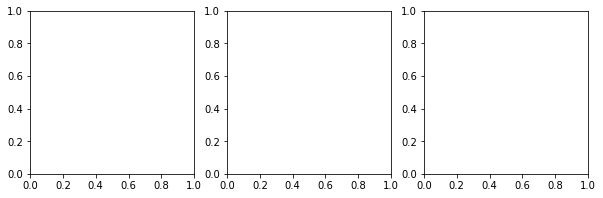

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (10 , 3)) #this will create the boxes

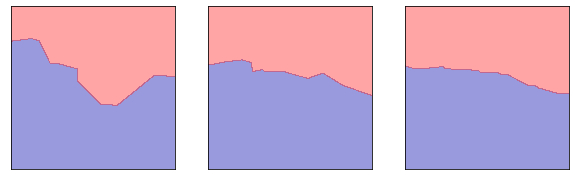

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (10 , 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate and fit in one line

  clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)

  #pretty pictures 

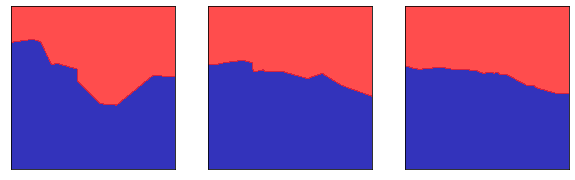

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (10 , 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate and fit in one line

  clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.56, ax = ax, alpha = .8)

  #pretty pictures 
  #change the color 
  

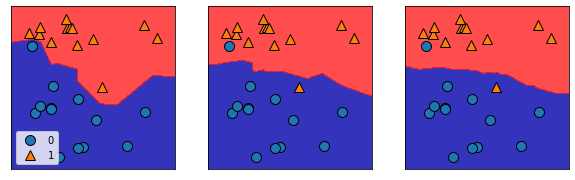

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (10 , 3)) #this will show the 3 graphs

for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate and fit in one line

  clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.56, ax = ax, alpha = .8)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)

axes[0].legend(loc = 3)

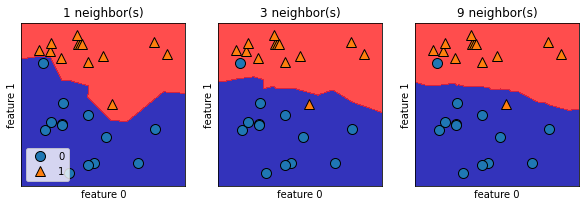

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (10 , 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate and fit in one line

  clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.56, ax = ax, alpha = .8)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

Decision boundaries created by the nearest neighbors model for different values of n_neighbors

More and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. 

#Investigating the breast cancer model 

Split the dataset into a training and a test set 

Evaluate the training and test set performance with different numbers of neighbors

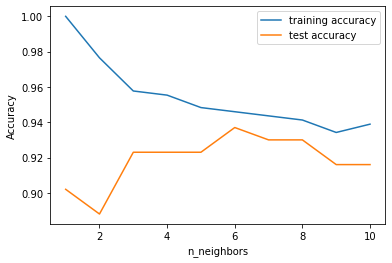

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10 

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  #build the model 
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train, y_train)
  #record training set accuracy 
  training_accuracy.append(clf.score(X_train, y_train))

  #record generalization accuracy 
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#K-neighbors regression

Regression variant of the k-nearest neighbors algorithm. 
Use the wave dataset 
Prediction uses a single neighbor as the target value of the nearest neighbor 


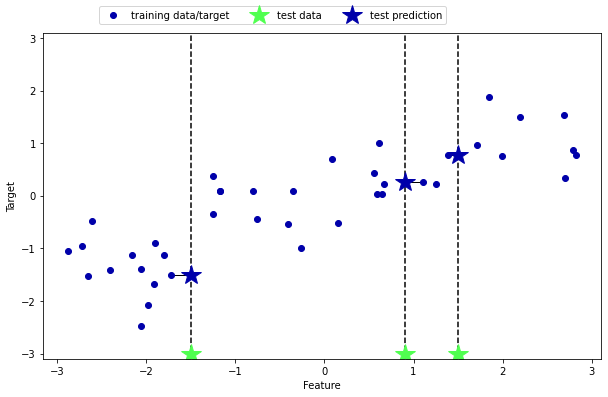

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

*Predictions made by one nearest neighbor regression on the wave dataset*

More than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average of the relevant neighbors 

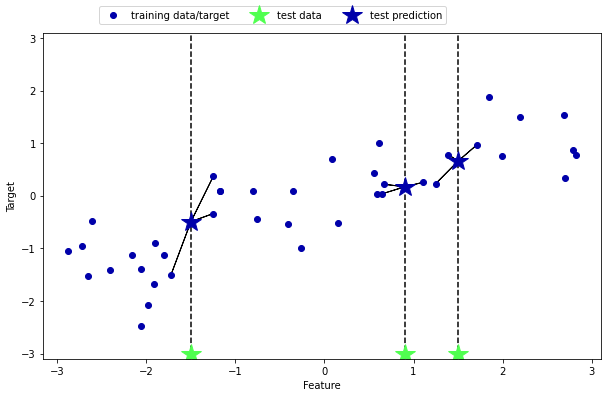

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors= 3)

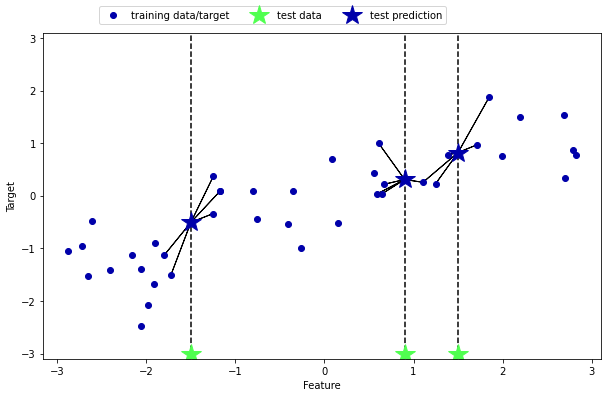

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors= 5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)
#split the wave dataset into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#instantiate the model and set the number of neighbors to consider to 3 

reg = KNeighborsRegressor(n_neighbors = 3)
#fit the model using the training data and training targets 
reg.fit(X_train, y_train)

print("Test set predictions: \n", reg.predict(X_test))

Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Evaluate the model using the score method, which for regressors returns the R^2 score. 

R^2, or coefficient of determination, is a measure of goodness of a prediction for a regression model. It yields a score that is between 0 and 1 with 1 being a perfect prediction. 0 means a constant model that predicts the mean of the training set responses, y_train. 

R^2 can be negative which indicates anticorrelated predictions. 

In [ ]:
print("Test set R^2: {:2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.834417


A score of 0.83 is a relatively good model fit 

#Analyzing KNeighborsRegressor

For 1 dimensional dataset, we can see what prediction looks like for all possible feature values. 


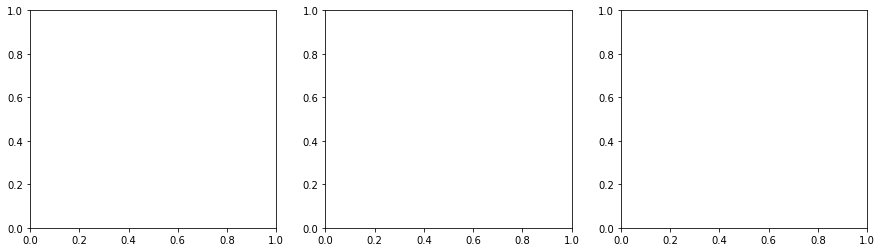

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
# create 1,000 data points, evenly spaced between - 3 and 3

line = np.linspace(-3, 3, 1000).reshape(-1,1)

Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


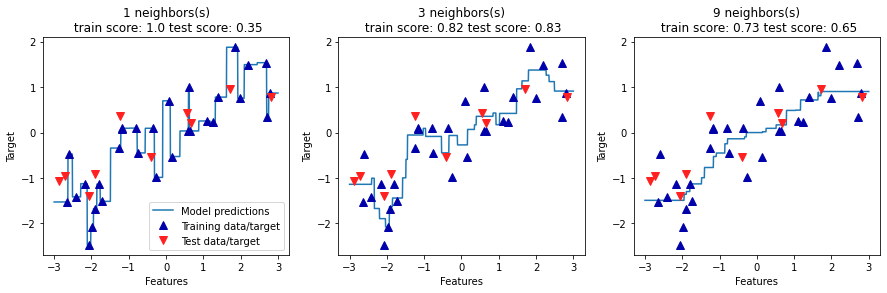

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)
#split the wave dataset into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#instantiate the model and set the number of neighbors to consider to 3 

reg = KNeighborsRegressor(n_neighbors = 3)
#fit the model using the training data and training targets 
reg.fit(X_train, y_train)

print("Test set predictions: \n", reg.predict(X_test))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between - 3 and 3

line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # make predictions using 1, 3, or 9 neighbors 
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
  ax.plot(X_test, y_test, 'v', c= mglearn.cm2(1), markersize = 8)

  ax.set_title("{} neighbors(s)\n train score: {:.2} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))

  ax.set_xlabel("Features")
  ax.set_ylabel("Target")

  axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")

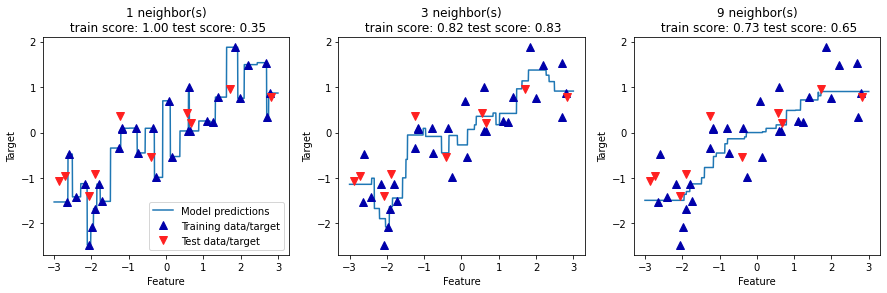

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")

Note! 


```
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 
```

will show the graphs

```
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
```

will show empty graphs



#Strengths, weaknesses, and parameters 

2 important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. 

Using small number of neighbors like 3 or 5 often works well. 

Choosing right distance measure is complicated. By default - Euclidean distance is used. 

**Strengths** of k-NN is the model is very easy to understand. Often gives reasonable performance without adjustments. GOod baseline method to try before considering more advanced techniques. 

Building to the nearest neighbors model is very fast. When training set is large in either number of features or number of samples, then prediction can be slow. 

WHen using k-NN algorithms, it is important to preprocess data. K-NN does well when features are 0 most of the time (or sparse datasets). 

